In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)

%matplotlib widget

In [2]:
lut = np.load('data/msAngleLUT.npy')
phiAxes = np.load('data/msAnglePhiAxes.npy')
pdfBins = int((lut[0, 0, 0, :].size-1)/3)
d = np.load('data/msAngleAxes.npz')
energyArray = d['arr_0']
stepsizeArray = d['arr_1']
densityArray = d['arr_2']

Text(0, 0.5, 'Frequency')

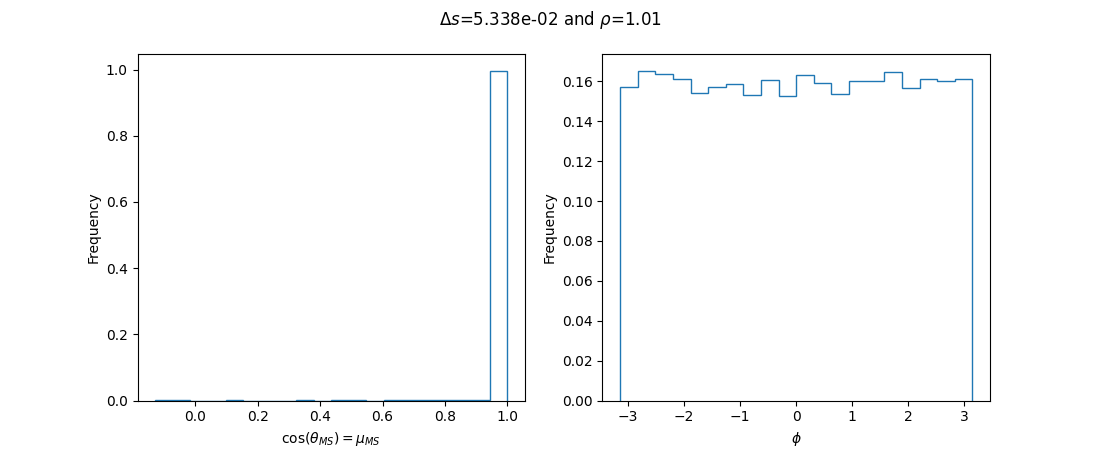

In [3]:
stepsizeIndex = energyArray.size//2
densityIndex = densityArray.size//2
energyIndex = energyArray.size//2

muCounts = lut[energyIndex, stepsizeIndex, densityIndex, 0:pdfBins]
muEdges = lut[energyIndex, stepsizeIndex, densityIndex, pdfBins:2*pdfBins+1]
phiCounts = lut[energyIndex, stepsizeIndex, densityIndex, 2*pdfBins+1:3*pdfBins+1]

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'$\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.stairs(muCounts/muCounts.sum(), muEdges)
ax1.set_xlabel('$\cos(\\theta_{MS}) = \mu_{MS}$')
ax1.set_ylabel('Frequency')
# ax1.legend()

ax2.stairs(phiCounts, phiAxes)
ax2.set_xlabel('$\phi$')
ax2.set_ylabel('Frequency')
# ax2.legend()

In [4]:
muCounts.sum()

17.72416669443647